In [7]:
def accuracy(tp,fp,tn,fn):
    return round((tp+tn)/(tp+fp+tn+fn),2)

def recall(tp,fn):
    return round(tp/(tp+fn),2)

def precision(tp,fp):
    return round(tp/(tp+fp),2)

def specificity(tn,fp):
    return round(tn/(tn+fp),2)

def f1score(precision,recall):
    return round((2*precision*recall)/(precision+recall),2)

In [8]:
import pandas as pd
import os
directory = './'
models = []
results = {
    'Accuracy':[],
    'Recall':[],
    'Precision':[],
    'Specificity':[],
    'F1Score':[]
}
for file in os.scandir(directory):
    if file.is_file():
        if "csv" in file.name:
            filetag = file.name[:-4]
            df = pd.read_csv(f"{filetag}.csv",sep=";")

            tp=0
            fp=0
            tn=0
            fn=0
    
            for index,row in df.iterrows():
                if row['Prediction'] == 'T' and row['Reference'] == 'T':
                    tp += 1
                elif row['Prediction'] == 'T' and row['Reference'] == 'F':
                    fp += 1
                elif row['Prediction'] == 'F' and row['Reference'] == 'T':
                    fn += 1
                elif row['Prediction'] == 'F' and row['Reference'] == 'F':
                    tn += 1
            models.insert(0, filetag)
            results['Accuracy'].insert(0,accuracy(tp,fp,tn,fn))
            results['Recall'].insert(0,recall(tp,fn))
            results['Precision'].insert(0,precision(tp,fp))
            results['Specificity'].insert(0,specificity(tn,fp))
            results['F1Score'].insert(0,f1score(precision(tp,fp),recall(tp,fn)))

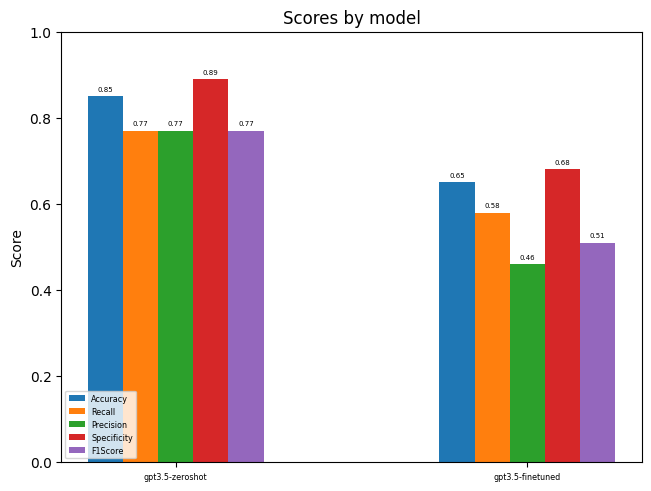

In [9]:
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import gca

from matplotlib.pyplot import figure, savefig, show, subplots
from seaborn import heatmap
from numpy import array, ndarray
from matplotlib.figure import Figure

file_tag = "comparisongpt"
import numpy as np


x = np.arange(len(models))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3,fontsize=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores by model')
ax.set_xticks(x + width, models)
ax.legend(loc='lower left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 1)
ax.tick_params(axis="x", labelrotation=0, labelsize="xx-small")


savefig(f"{file_tag}.png", bbox_inches='tight')
show()